In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
# 读取Excel文件,转化成数据框
data_sell = pd.read_excel("C:/Users/surface/Desktop/selling_price.xlsx", sheet_name="Sheet1")
df_sell = pd.DataFrame(data_sell)
print(df_sell.head(3))

data_rent = pd.read_excel("C:/Users/surface/Desktop/rental_price.xlsx", sheet_name="Sheet1")
df_rent = pd.DataFrame(data_rent)
print(df_rent.head(3))

    name  id  area  total_price  unit_price
0  中新生态城   1  89.5         80.0        8938
1  中新生态城   1  83.0        120.0       14457
2  中新生态城   1  76.0         65.0        8552
    name  id  area  rent_price
0  中新生态城   1    89        3000
1  中新生态城   1    83        2800
2  中新生态城   1   135        4000


In [8]:
sell_description = df_sell[['area','total_price','unit_price']].describe()
print("对二手房总体数据的描述:\n", sell_description)

rent_description = df_rent[['area','rent_price']].describe()
print("对租房总体数据的描述:\n", rent_description)

对二手房总体数据的描述:
               area  total_price     unit_price
count  4425.000000  4425.000000    4425.000000
mean    102.338816   257.700949   30131.776497
std      58.063676   224.168250   22424.321887
min       4.800000    24.000000    4190.000000
25%      62.610000   118.000000   13348.000000
50%      98.000000   192.000000   22033.000000
75%     129.000000   325.000000   43215.000000
max     673.850000  2450.000000  139915.000000
对租房总体数据的描述:
               area    rent_price
count  1061.000000   1061.000000
mean     99.227144   4080.378888
std      57.686827   4734.290784
min      10.000000    500.000000
25%      68.000000   2000.000000
50%      90.000000   3000.000000
75%     117.000000   4500.000000
max     633.000000  55000.000000


In [9]:
#分组分类描述数据

sell_area = df_sell.groupby('name')[['area']].describe()
print(sell_area,'\n') #换行保证数据输出美观
price_selling = df_sell.groupby('name')[['total_price']].describe()
price_selling = round(price_selling,2)
print(price_selling,'\n')

rent_area = df_rent.groupby('name')[['area']].describe()
print(rent_area,'\n')
price_rental = df_rent.groupby('name')[['rent_price']].describe()
price_rental = round(price_rental,2)
print(price_rental,'\n')

         area                                                            \
        count        mean        std    min      25%      50%       75%   
name                                                                      
中新生态城  1558.0  128.946727  56.624075  42.00  95.2300  117.000  143.6050   
八里台    1067.0  112.801162  52.864510  20.41  75.5000  109.070  141.6100   
和平     1200.0   54.398992  42.313295   4.80  25.2925   47.445   65.7150   
武清      600.0  110.521050  36.066225  22.00  87.3100  103.020  126.0275   

               
          max  
name           
中新生态城  673.85  
八里台    304.45  
和平     355.58  
武清     337.60   

      total_price                                                    
            count    mean     std   min    25%    50%     75%     max
name                                                                 
中新生态城      1558.0  201.60  145.30  37.0  105.0  159.0  255.00  1499.0
八里台        1067.0  371.22  326.26  42.0  185.0  299.0  416.00  2450.0
和平        

In [10]:
#处理单位租金价格

for df in [df_rent]:
    df['rent_per'] = df['rent_price'] / df['area']

price_per = df_rent.groupby('name')[['rent_per']].describe()
price_per = round(price_per,2)
print(price_per,'\n')

      rent_per                                                  
         count   mean    std    min    25%    50%    75%     max
name                                                            
中新生态城    439.0  25.24   6.13   8.85  21.93  25.25  28.81   72.46
八里台       68.0  42.77  11.58  23.45  34.17  40.16  50.18   78.95
和平       410.0  67.71  16.35  35.86  56.55  66.04  76.40  160.77
武清       144.0  17.46   5.91   5.88  14.04  17.21  19.65   39.41 



In [11]:
# 分别计算中位数：从数据描述来看，每组的中位数都是正常的
sell_mid = df_sell.groupby('name')['unit_price'].median()
rent_mid = df_rent.groupby('name')['rent_per'].median()
ratio_mid = round(sell_mid/rent_mid,3)

print("Median Rent-Sale Ratio:", ratio_mid)

#数据处理一下，展示更美观
ratio_mid_1 = round((sell_mid/rent_mid)/100,3)

Median Rent-Sale Ratio: name
中新生态城    559.885
八里台      660.636
和平       839.573
武清       671.986
dtype: float64


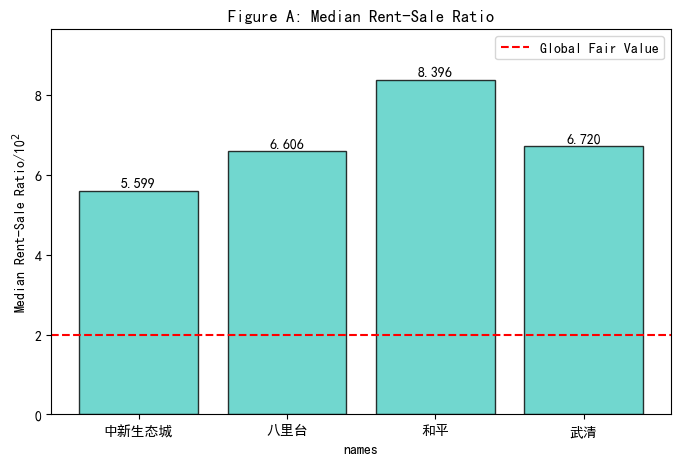

In [29]:
#Figure A：四个地区的租售比

# 配置中文字体（如果出现乱码）
plt.rcParams["font.sans-serif"] = ["SimHei"]  # Windows系统使用黑体

# 创建画布
plt.figure(figsize=(8, 5)) 

# 提取数据
names = ratio_mid_1.index.tolist()
ratios = ratio_mid_1.values.tolist()

# 绘制柱状图
bars = plt.bar(
    names, 
    ratios,
    color="#4ECDC4",  # 柱体颜色
    edgecolor="black",  # 边框颜色
    alpha=0.8  # 透明度
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # 标签水平居中
        height + 0.1,  # 标签垂直位置-略高于柱子
        f"{height:.3f}",  # 保留3位小数
        ha="center",
        fontsize=10
    )

plt.axhline(2, color='r', linestyle='--', label="Global Fair Value")

# 设置标题和坐标轴
plt.title("Figure A: Median Rent-Sale Ratio")
plt.xlabel("names")
plt.ylabel(f"Median Rent-Sale Ratio/10$^2$")
plt.ylim(0, max(ratios) * 1.15)  # 设置Y轴范围:留15%空白
plt.legend()# 添加图例

plt.show()

In [15]:
#拟合模型

model_1 = smf.ols('unit_price ~ area + id + area:id', data=df_sell).fit()
print(model_1.summary())
model_2 = smf.ols('rent_per ~ area + id + area:id', data=df_rent).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2697.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:51:02   Log-Likelihood:                -48306.
No. Observations:                4425   AIC:                         9.662e+04
Df Residuals:                    4421   BIC:                         9.664e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.079e+04   1058.573    -19.644      0.0

In [24]:
# 对给出的面积进行租售比预测

new_data = pd.DataFrame({
    'area': [50, 50, 50, 50, 100, 100, 100, 100],
    'id': [1, 2, 3, 4, 1, 2, 3, 4]
})

# 预测租价和售价
new_data['unit_price'] = model_1.predict(new_data)
new_data['rent_per'] = model_2.predict(new_data)

# 预测租售比
new_data['rent_price_ratio'] = new_data['unit_price']/new_data['rent_per']

# Optional: Format the output more nicely
print("\nPredicted Results:")
for _, row in new_data.iterrows():
    print(f"Area: {row['area']}m², ID: {row['id']}")
    print(f"  Predicted Selling Price: {row['unit_price']:.2f}")
    print(f"  Predicted Rental Price: {row['rent_per']:.2f}")
    print(f"  Ratio: {row['rent_price_ratio']:.2f}")
    print()


Predicted Results:
Area: 50.0m², ID: 1.0
  Predicted Selling Price: 4372.32
  Predicted Rental Price: 20.88
  Ratio: 209.44

Area: 50.0m², ID: 2.0
  Predicted Selling Price: 21402.24
  Predicted Rental Price: 35.00
  Ratio: 611.47

Area: 50.0m², ID: 3.0
  Predicted Selling Price: 38432.16
  Predicted Rental Price: 49.13
  Ratio: 782.32

Area: 50.0m², ID: 4.0
  Predicted Selling Price: 55462.08
  Predicted Rental Price: 63.25
  Ratio: 876.86

Area: 100.0m², ID: 1.0
  Predicted Selling Price: 8730.52
  Predicted Rental Price: 20.88
  Ratio: 418.17

Area: 100.0m², ID: 2.0
  Predicted Selling Price: 21981.83
  Predicted Rental Price: 35.62
  Ratio: 617.16

Area: 100.0m², ID: 3.0
  Predicted Selling Price: 35233.13
  Predicted Rental Price: 50.36
  Ratio: 699.66

Area: 100.0m², ID: 4.0
  Predicted Selling Price: 48484.43
  Predicted Rental Price: 65.10
  Ratio: 744.80



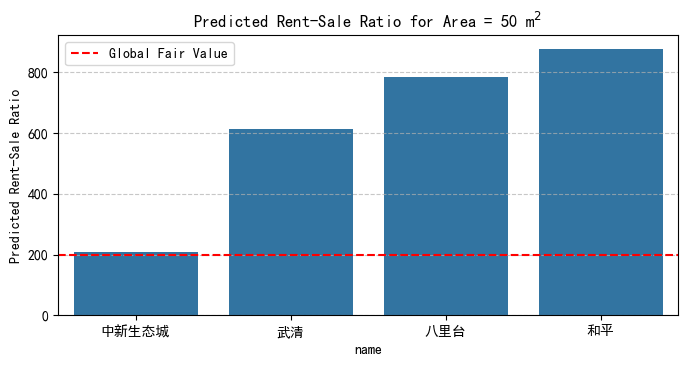

In [45]:
# area=50m^2的图

plt.figure(figsize=(8, 8))

# Create subplot for area=50
plt.subplot(2, 1, 1)
sns.barplot(x='id', y='rent_price_ratio', data=new_data[new_data['area'] == 50])
plt.title('Predicted Rent-Sale Ratio for Area = 50 m$^2$')
plt.xlabel('name')
plt.ylabel('Predicted Rent-Sale Ratio')
plt.xticks([0, 1, 2, 3], ['中新生态城', '武清', '八里台', '和平'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(200, color='r', linestyle='--', label="Global Fair Value")
plt.legend()# 添加图例

plt.show()

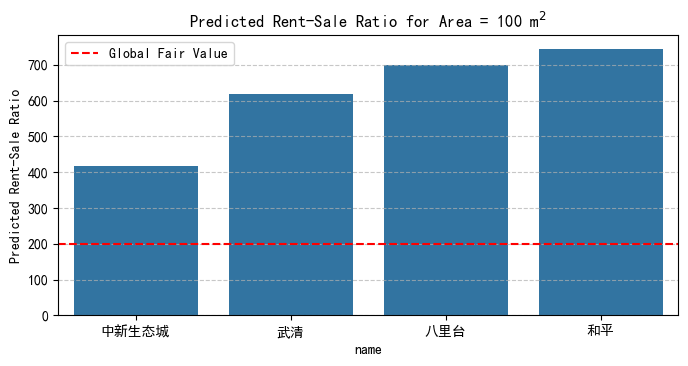

In [46]:
# area=100m^2的图

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 2)
sns.barplot(x='id', y='rent_price_ratio', data=new_data[new_data['area'] == 100])
plt.title('Predicted Rent-Sale Ratio for Area = 100 m$^2$')
plt.xlabel('name')
plt.ylabel('Predicted Rent-Sale Ratio')
plt.xticks([0, 1, 2, 3], ['中新生态城', '武清', '八里台', '和平'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(200, color='r', linestyle='--', label="Global Fair Value")
plt.legend()# 添加图例

plt.show()

<Figure size 1000x1000 with 0 Axes>

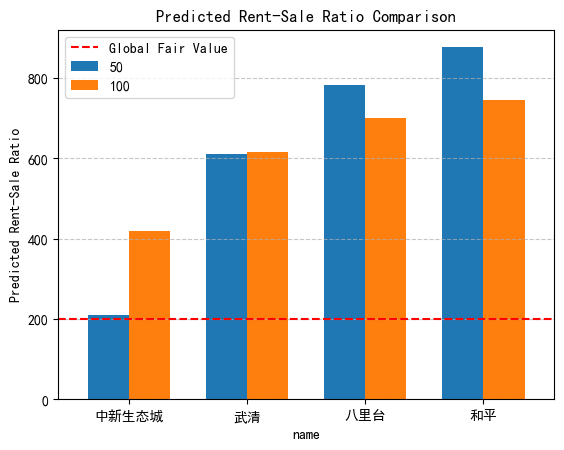

In [47]:
# 合并两张图

plt.figure(figsize=(10, 10))
area_groups = new_data.pivot(index='id', columns='area', values='rent_price_ratio')
area_groups.plot(kind='bar', width=0.7)
plt.title('Predicted Rent-Sale Ratio Comparison')
plt.xlabel('name')
plt.ylabel('Predicted Rent-Sale Ratio')
plt.xticks([0, 1, 2, 3], ['中新生态城', '武清', '八里台', '和平'])
plt.xticks(rotation=0)
plt.legend(title='Area (m$^2$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(200, color='r', linestyle='--', label="Global Fair Value")
plt.legend()# 添加图例

plt.show()